<p>Exploring CEO Data ... Activity 11 - potential 
    solutions (version 1)</p>
<h1 style="color:blue">Exploring CEO Data</h1>
<p>
You are hired by a think tank that is preparing a report on CEO salary.  The think tank is especially interested in whether company performance is related to salary.  They have collected data on a selection of companies, provided in the file ceo.csv.  You are also given the following codebook:<p>

variable | description
-------|--
 salary | 1990 compensation, \$1000s
 age | in years
 college | =1 if attended college
 grad | =1 if attended graduate school
 comten |years with company
 ceoten |years as ceo with company
 profits |1990 profits, millions
 mktval |market value, end 1990, mills.



In [2]:
import pandas as pd

CEO = pd.read_csv('ceo.csv')
CEO.columns

Index(['salary', 'age', 'college', 'grad', 'comten', 'ceoten', 'profits',
       'mktval'],
      dtype='object')

Begin with an orientation to the data.  What are the types of variables?

In [4]:
# start by loading the data into a data frame
type(CEO)
# since it's a dataframe we can use those methods ... 
types_of_data = CEO.dtypes
print(f"types of data:\n{types_of_data}\n")

types of data:
salary     int64
age        int64
college    int64
grad       int64
comten     int64
ceoten     int64
profits    int64
mktval     int64
dtype: object



How many observations are there?

In [5]:
# one way is to use the plain ol' count() method:
CEO.count()

salary     185
age        185
college    185
grad       185
comten     185
ceoten     185
profits    185
mktval     185
dtype: int64

How many missing values are there?

In [13]:
# missing values are a real problem so we always check ...
# and we could reindex the data and search or select individual
# columns ... let's experiment.  A "False" means the value
# is present (≠ isnull).  Here we see that of the 185 counts
# from the 
print("Individual Column test")
CEO['salary'].isnull()
# we can repeat this for each value or check out the
# entire data frame ...


print("\nUsing numpy and pandas ... ")
import numpy as np
import pandas as pd
print(np.where(pd.isnull(CEO)))
# nothing should show up

# and yet another way ... 
print("\na final way ")
print([CEO.iloc[i, j] for i,j in zip(*np.where(pd.isnull(CEO)))])

Individual Column test

Using numpy and pandas ... 
(array([], dtype=int64), array([], dtype=int64))


[]


<hr/>
<h2>Examine key variables</h2>
<p>
Pull up histograms of variables of key interest: salary, profits, mktval.  What does the shape of each distribution look like?  What can you learn if you take the log of salary?</p>

In [17]:
# for making histograms or any data plot
# we need some plotting library.

# first we want to extracdt our 3 key variables: salary, profits, mktval.
newceo = CEO.loc[0:3, ['salary','profits','mktval']]
print(newceo)
print(newceo.count())

   salary  profits  mktval
0    1033      478    7300
1     879      212    4900
2     971       69     609
3     567       65    1700
salary     4
profits    4
mktval     4
dtype: int64


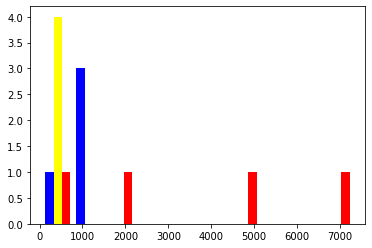

In [23]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

colors = ['blue', 'yellow', 'red']
names = ['Salary', 'Profits', 'Market']

plt.hist(newceo, color=colors,label = names)
plt.show()

Always remember that the data might contain errors, including miscodings and measurement errors.  What are some sanity checks you can apply to these variables?  See if you can find any rows that you think contain errors.

In [32]:
# sanity check - make sure we know the head, tail of the data
# and maybe check for values out of range?
print(f"HEAD:\n {newceo.head()}")
print(f"TAIL:\n {newceo.tail()}")

# and min and max?
print(f"\nCheck out the max values ... \n")
print(newceo.max())

print(f"\nMin: {newceo.min()}")

HEAD:
    salary  profits  mktval
0    1033      478    7300
1     879      212    4900
2     971       69     609
3     567       65    1700
TAIL:
    salary  profits  mktval
0    1033      478    7300
1     879      212    4900
2     971       69     609
3     567       65    1700

Check out the max values ... 

salary     1033
profits     478
mktval     7300
dtype: int64

Min: salary     567
profits     65
mktval     609
dtype: int64


### Creating a new variable

Combine the profits and mktval into a combined measure that may be interesting from a performance perspective.

In [41]:
# there's a couple of techniques, like apply() and Numpy's select() method
# we can make new columns from other columns
# or for based on conditions
# in this scenario, we might want to do some job-specific
# activity; here say salary + a 10% share of the profits 

newceo.apply(lambda row: row.salary + (row.profits*.10), axis = 1)

0    1080.8
1     900.2
2     977.9
3     573.5
dtype: float64

### Examine bivariate relationships

Create a scatterplot with profit on the x-axis and salary on the y-axis.  What do you notice about the shape of this relationship?  What kind of model / equation could you use to to represent it?

Can you explain what is going on around 0 profit?

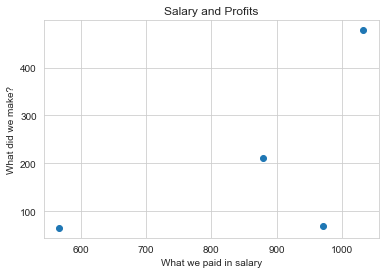

In [55]:
# import our libraries; here we'll add seaborn, too.
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
plt.scatter(newceo.salary, newceo.profits)
plt.title("Salary and Profits")
plt.xlabel("What we paid in salary")
plt.ylabel("What did we make?")
plt.show()


Next, consider how the college variable is related to salary.  Try computing means, try using histograms.

In [67]:
CEO

salary  age  college  grad  comten  ceoten  profits  mktval
0      1033   62        1     1      30       1      478    7300
1       879   63        1     1      21       9      212    4900
2       971   72        1     1      33      24       69     609
3       567   56        1     0      31      10       65    1700
4      1336   60        1     1      21      13      562    4300
..      ...  ...      ...   ...     ...     ...      ...     ...
180    1350   68        1     1       5       5       92    2100
181     999   52        1     0      28      17       21     398
182     559   57        1     1      34      16       56     653
183     625   57        0     0      36       9       87     979
184     713   57        1     1      12       2       55    1300

[185 rows x 8 columns]

<AxesSubplot:xlabel='salary', ylabel='college'>

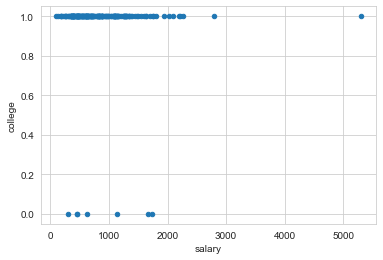

In [74]:
# this plot isn't very attractive  ... we could have
# extracted only the data where college is True and 
# then used that subplot.  Here is an example
# the main dataframe where both are included ... so we 
# have to interpret the 1 as True and 0.0 as no-college.

CEO.plot(x = "salary", y = "college", kind = "scatter")


Examine other bivariate relationships as your time allows.  Remember your objectives to understand the structure of the data, and especially to look for clues about whether salary is related to company performance.

In [75]:
# ------------------------- a spin-off of a scatter plot.
# another plot
sns.set_style("whitegrid")
sns.pairplot(newceo, hue="profits", height=3)
plt.show()

<AxesSubplot:xlabel='age', ylabel='salary'>

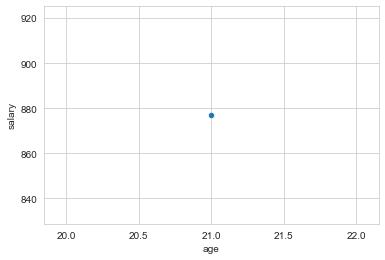

In [78]:
# age and salary - any young folk making a lot of Benjamins?

CEO[CEO['age'] < 30].plot.scatter(x='age',y='salary')

<AxesSubplot:xlabel='profits', ylabel='mktval'>

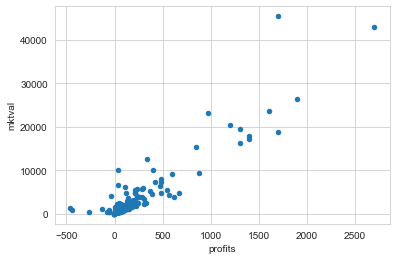

In [81]:
CEO[CEO['comten'] > 2].plot.scatter(x='profits',y='mktval')

<hr />
<p>This is just a quick potential solution; other instructors doubtless will create vastly better solutions.</p>